In [21]:
Graphics Shapes;

# Stereographic projection
The unit sphere S2 in three-dimensional space R3 is the set of points (x, y, z) such that x^2 + y^2 + z^2 = 1. Let N = (0, 0, 1) be the "north pole", and let M be the rest of the sphere. The plane z = 0 runs through the center of the sphere; the "equator" is the intersection of the sphere with this plane.

For any point P on M, there is a unique line through N and P, and this line intersects the plane z = 0 in exactly one point P′, known as the stereographic projection of P onto the plane.

In Cartesian coordinates (x, y, z) on the sphere and (X, Y) on the plane, the projection and its inverse are given by the formulas

-Graphics3D-
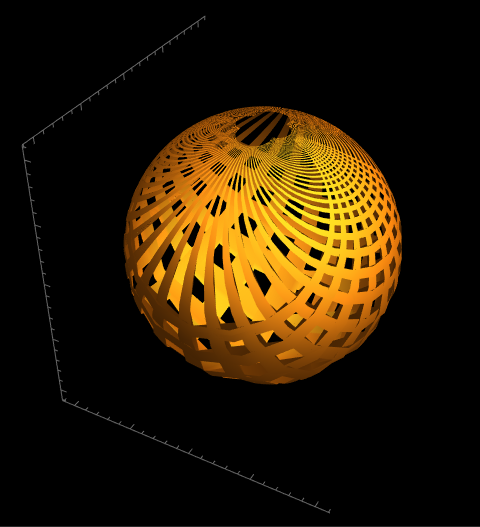

In [3]:
F[{x_, y_}] := {(2 x)/(1 + x^2 + y^2), (2 y)/(1 + x^2 + y^2), (-1 + x^2 + y^2)/(1 + x^2 + y^2)}
px[x_] := ParametricPlot3D[ F[{x + u, y}], {u, 0, 0.1}, {y, -8, 8},  Mesh -> None]
py[y_] :=  ParametricPlot3D[ F[{x, y + u}], {u, 0, 0.1}, {x, -8, 8}, Mesh -> None]
output = Show[Table[px[t], {t, -10, 10, 0.22}]~Join~Table[py[t], {t, -1, 1, 0.22}],
PlotRange -> {{-1, 1}, {-1, 1}, {-1, 1}}, Background -> Black, Boxed -> False]

In [7]:
Export["STL/Stereographic.stl", output]

STL/Stereographic.stl

# Styling of surfaces

-Graphics3D-
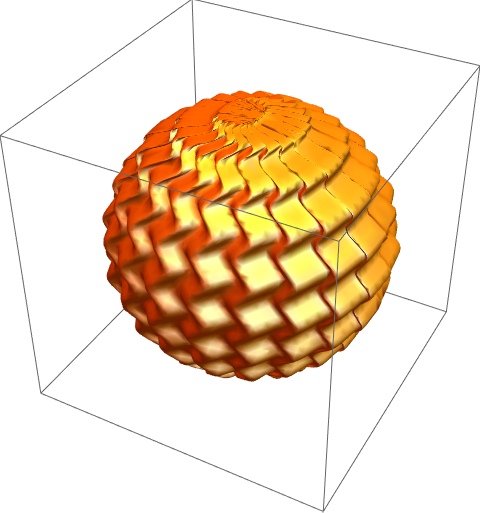

In [8]:
ParametricPlot3D[ {Sin[u] Sin[v] + 0.05 Cos[20 v], 
  Cos[u] Sin[v] + 0.05 Cos[20 u], 
  Cos[v]}, {u, -\[Pi], \[Pi]}, {v, -\[Pi], \[Pi]}, MaxRecursion -> 4, 
 PlotStyle -> {Orange, Specularity[White, 10]}, Axes -> None, 
 Mesh -> None]

# Enneper surface
In differential geometry and algebraic geometry, the Enneper surface is a self-intersecting surface that can be described parametrically by:

\begin{aligned}x&={\tfrac {1}{3}}u\left(1-{\tfrac {1}{3}}u^{2}+v^{2}\right),\\y&={\tfrac {1}{3}}v\left(1-{\tfrac {1}{3}}v^{2}+u^{2}\right),\\z&={\tfrac {1}{3}}\left(u^{2}-v^{2}\right).\end{aligned}
It was introduced by Alfred Enneper in 1864 in connection with minimal surface theory

-Graphics3D-
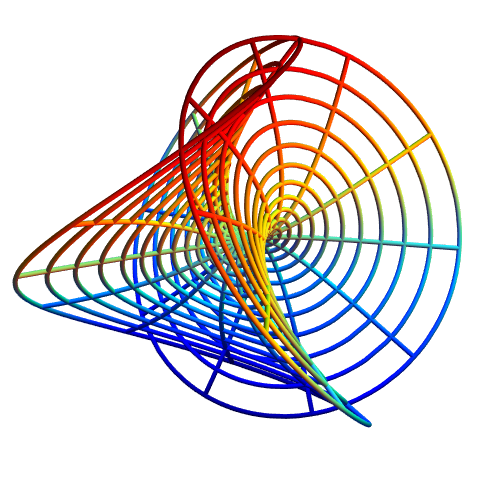

In [9]:
jet[u_?NumericQ] :=
        Blend[{{0, RGBColor[0, 0, 9/16]}, {1/9, Blue}, {23/63, Cyan}, {13/21, Yellow},
               {47/63, Orange}, {55/63, Red}, {1, RGBColor[1/2, 0, 0]}}, u] /; 0 <= u <= 1

(* generalized Enneper surface, polar parametrization *)
enneperpolar[n_Integer, r_, θ_] := {r Cos[θ] - r^(2 n - 1)/(2 n - 1) Cos[(2 n - 1) θ],
                                    r Sin[θ] + r^(2 n - 1)/(2 n - 1) Sin[(2 n - 1) θ],
                                    (2 r^n)/n Cos[n θ]}

With[{n = 2, p = 25, q = 15}, 
     Show[ParametricPlot3D[Table[enneperpolar[n, r, θ], {θ, -π, π, 2 π/p}], {r, 0, 2},
                           ColorFunction -> (jet[#3] &), PlotRange -> All,
                           PlotStyle -> Directive[CapForm[None], JoinForm["Miter"]]], 
          ParametricPlot3D[Table[enneperpolar[n, r, θ], {r, 0, 2, 2/q}], {θ, -π, π}, 
                           ColorFunction -> (jet[#3] &), PlotRange -> All,
                           PlotStyle -> Directive[CapForm[None], JoinForm["Miter"]]], 
          Axes -> None, Boxed -> False, Lighting -> "Classic"] /.
     Line[pts_, rest___] :> Tube[pts, 1/20, rest]]

# Möbius strip
In mathematics, a Möbius strip, Möbius band, or Möbius loop (US: /ˈmoʊbiəs, ˈmeɪ-/ MOH-bee-əs, MAY-, UK: /ˈmɜːbiəs/;[1] German: [ˈmøːbi̯ʊs]), also spelled Mobius or Moebius, is a surface with only one side (when embedded in three-dimensional Euclidean space) and only one boundary curve. The Möbius strip is the simplest non-orientable surface. It can be realized as a ruled surface. Its discovery is attributed independently to the German mathematicians Johann Benedict Listing and August Ferdinand Möbius in 1858,[2][3][4][5] though similar structures can be seen in Roman mosaics c. 200–250 AD.[6][7] Möbius published his results in his articles "Theorie der elementaren Verwandtschaft" (1863) and "Ueber die Bestimmung des Inhaltes eines Polyëders" 

-Graphics3D-
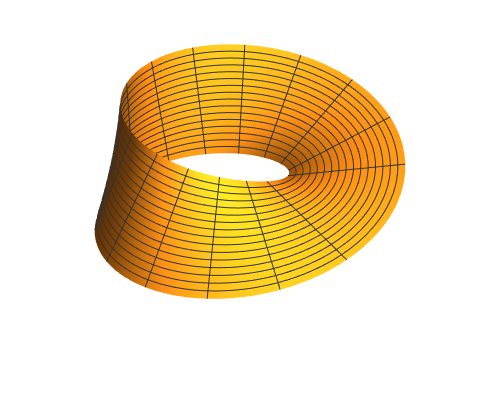

In [13]:
 x[u_, v_] := (1 + (v/2) Cos[u/2]) Cos[u]
 y[u_, v_] := (1 + (v/2) Cos[u/2]) Sin[u]
 z[u_, v_] := (v/2) Sin[u/2]


plot = ParametricPlot3D[{x[u, v], y[u, v], z[u, v]}, {u, 0, 
    2Pi}, {v, -1, 1}, Boxed -> False, Axes -> False, PlotPoints->250]

In [17]:
Export["Möbius_strip.stl", plot]

Möbius_strip.stl

# Boy's surface
In geometry, Boy's surface is an immersion of the real projective plane in 3-dimensional space found by Werner Boy in 1901. He discovered it on assignment from David Hilbert to prove that the projective plane could not be immersed in 3-space.

Boy's surface was first parametrized explicitly by Bernard Morin in 1978.[1] Another parametrization was discovered by Rob Kusner and Robert Bryant.[2] Boy's surface is one of the two possible immersions of the real projective plane which have only a single triple point.[3]

Unlike the Roman surface and the cross-cap, it has no other singularities than self-intersections (that is, it has no pinch-points).

-Graphics3D-
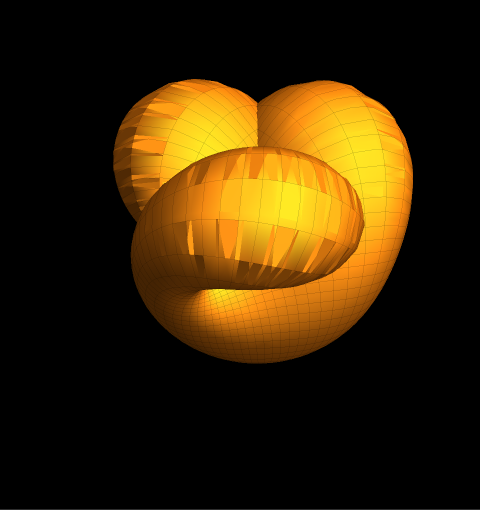

In [18]:
g1[x_] := -3/2*Im[x*(1 - x^4)/(x^6 + Sqrt[5]*x^3 - 1)]
g2[x_] := -3/2*Re[x*(1 + x^4)/(x^6 + Sqrt[5]*x^3 - 1)]
g3[x_] := Im[(1 + x^6)/(x^6 + Sqrt[5]*x^3 - 1)] - 1/2
x[x_] := g1[x]/(g1[x]^2 + g2[x]^2 + g3[x]^2)
y[x_] := g2[x]/(g1[x]^2 + g2[x]^2 + g3[x]^2)
z[x_] := g3[x]/(g1[x]^2 + g2[x]^2 + g3[x]^2)
w[r_, f_] := r*(Cos[f] + I*Sin[f])
ParametricPlot3D[{x[w[r, f]], y[w[r, f]], z[w[r, f]]}, {r, 0, 1}, {f,0, 2*Pi}, Mesh -> {40, 80}, MeshStyle -> Opacity[0.2], 
 PlotRange -> Automatic, Boxed -> False, Axes -> False, 
 Background -> Black, PlotStyle -> Opacity[1]]

-Graphics3D-
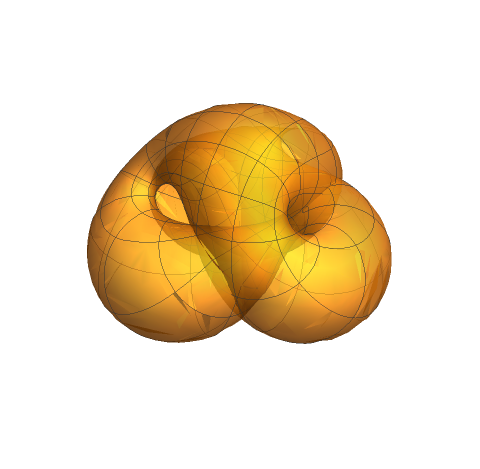

In [26]:
ParametricPlot3D[With[{z = u + I v}, (#/(#.#)) &[Re[{0, 0, 1/2} +
                      {I z (1 - z^4), z (z^4 + 1), -(2 I/3) (z^6 + 1)}/
                      (z^6 + Sqrt[5] z^3 - 1)]]], {u, v} ∈ Disk[],
                 Axes -> None, Boxed -> False, Mesh -> True,
                 PlotPoints -> {20, 30}, PlotStyle -> Opacity[2/3]]

# Hyperbolic Paraboloid
In geometry, a paraboloid is a quadric surface that has exactly one axis of symmetry and no center of symmetry. The term "paraboloid" is derived from parabola, which refers to a conic section that has a similar property of symmetry.

Every plane section of a paraboloid by a plane parallel to the axis of symmetry is a parabola. The paraboloid is hyperbolic if every other plane section is either a hyperbola, or two crossing lines (in the case of a section by a tangent plane). The paraboloid is elliptic if every other nonempty plane section is either an ellipse, or a single point (in the case of a section by a tangent plane). A paraboloid is either elliptic or hyperbolic.

Equivalently, a paraboloid may be defined as a quadric surface that is not a cylinder, and has an implicit equation whose part of degree two may be factored over the complex numbers into two different linear factors. The paraboloid is hyperbolic if the factors are real; elliptic if the factors are complex conjugate.

-Graphics3D-
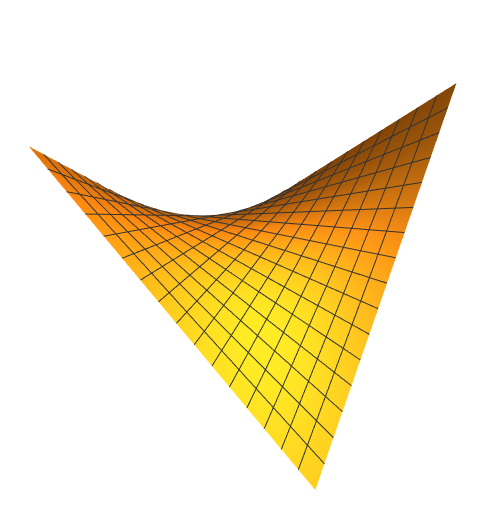

In [17]:
Paraboloid=ParametricPlot3D[{u, v, u v}, {u, -1, 1}, {v, -1, 1}, Boxed -> False, 
 Axes -> False]

In [18]:
Export["Paraboloid.stl", Paraboloid]

Paraboloid.stl

# Gyroid
The gyroid is the unique non-trivial embedded member of the associate family of the Schwarz P and D surfaces. Its angle of association with respect to the D surface is approximately 38.01°. The gyroid is similar to the lidinoid. The gyroid was discovered in 1970 by NASA scientist Alan Schoen. He calculated the angle of association and gave a convincing demonstration of pictures of intricate plastic models, but did not provide a proof of embeddedness. Schoen noted that the gyroid contains neither straight lines nor planar symmetries. Karcher[3] gave a different, more contemporary treatment of the surface in 1989 using conjugate surface construction. In 1996 Große-Brauckmann and Wohlgemuth[4] proved that it is embedded, and in 1997 Große-Brauckmann provided CMC (constant mean curvature) variants of the gyroid and made further numerical investigations about the volume fractions of the minimal and CMC gyroids.

The gyroid separates space into two oppositely congruent labyrinths of passages. The gyroid has space group I4132 (no. 214).[5] Channels run through the gyroid labyrinths in the (100) and (111) directions; passages emerge at 70.5 degree angles to any given channel as it is traversed, the direction at which they do so gyrating down the channel, giving rise to the name "gyroid". One way to visualize the surface is to picture the "square catenoids" of the P surface (formed by two squares in parallel planes, with a nearly circular waist); rotation about the edges of the square generate the P surface. In the associate family, these square catenoids "open up" (similar to the way the catenoid "opens up" to a helicoid) to form gyrating ribbons, then finally become the Schwarz D surface. For one value of the associate family parameter the gyrating ribbons lie in precisely the locations required to have an embedded surface.

The gyroid refers to the member that is in the associate family of the Schwarz P surface, but in fact the gyroid exists in several families that preserve various symmetries of the surface; a more complete discussion of families of these minimal surfaces appears in triply periodic minimal surfaces.

Curiously, like some other triply periodic minimal surfaces, the gyroid surface can be trigonometrically approximated by a short equation:




{452.211, Null}
BoundaryMeshRegion[<3>, <3>]
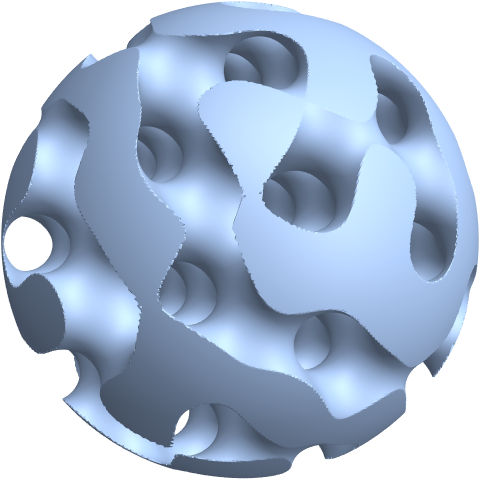

In [3]:
a = 3 \[Pi];
mesh = BoundaryDiscretizeRegion[
    ImplicitRegion[
     Sin[x] Cos[y] + Sin[y] Cos[z] + Sin[z] Cos[x] < 0 && 
      x^2 + y^2 + z^2 < a^2,
     {{x, -a, a}, {y, -a, a}, {z, -a, a}}], 
    MaxCellMeasure -> .1/10]; // AbsoluteTiming
mesh

In [6]:
Export["gyroid.stl", mesh]

gyroid.stl

# Fresnel's Elasticity Surface
The envelope of the plane

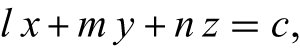

where c is the speed of propagation of a wave in the direction (l,m,n) (i.e., l, m, and n are the direction cosines) is known as the wave surface of a given medium (Love 1944, p. 299).

In an isotropic medium, c is independent of l, m, and n and is given by

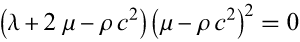

where rho is the medium density and lambda and mu are the so-called Lamé constants of the solid. The wave surface is then two-sheeted and both sheets are spheres (Love 1944, p. 299).

In the case of anisotropy, the surface in consists of three sheets corresponding to the values of c^2 that are roots of

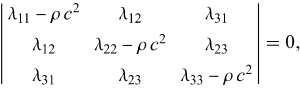

where the lambda_(ij) are functions of l, m, and n in terms of the coefficients of the strain-energy function (Christoffel 1877, Love 1944, p. 299). Green (1839) showed that the wave surface for the most general case of an elastic solid that allows the propagation of purely transverse plane waves consists of a sphere and the two sheets that are the envelope of the plane (1) subject to the condition

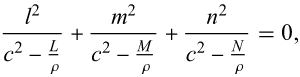

where L, M, and N are constants characteristic of the surface. The two sheets correspond to what is known as Fresnel's wave-surface (Love 1944, p. 299).

-Graphics3D-
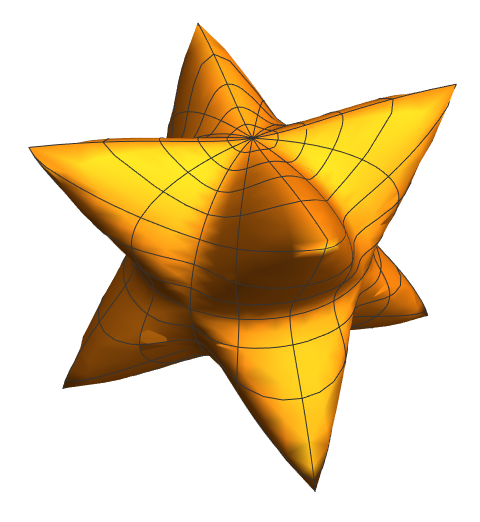

In [10]:
xx1[u_, v_] := 
  Cos[u] Cos[
     v]/(-2. Sqrt[
        0.965/3. - 
         0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
            Sin[v]^4)] Cos[(ArcCos[-(-0.941/6. + 
                0.374 ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + Sin[v]^4) - 
                1.309/6. ((Cos[u]^6 + Sin[u]^6) Cos[v]^6 + 
                   Sin[v]^6) - 
                1.221 Cos[u]^2 Cos[v]^4 Sin[u]^2 Sin[v]^2)/
             Sqrt[0.965/3. - 
                0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
                   Sin[v]^4)]^3] + Pi)/3.] + 0.8);
yy1[u_, v_] := 
  Sin[u] Cos[
     v]/(-2. Sqrt[
        0.965/3. - 
         0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
            Sin[v]^4)] Cos[(ArcCos[-(-0.941/6. + 
                0.374 ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + Sin[v]^4) - 
                1.309/6. ((Cos[u]^6 + Sin[u]^6) Cos[v]^6 + 
                   Sin[v]^6) - 
                1.221 Cos[u]^2 Cos[v]^4 Sin[u]^2 Sin[v]^2)/
             Sqrt[0.965/3. - 
                0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
                   Sin[v]^4)]^3] + Pi)/3.] + 0.8);
zz1[u_, v_] := 
  Sin[v]/(-2. Sqrt[
       0.965/3. - 
        0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
           Sin[v]^4)] Cos[(ArcCos[-(-0.941/6. + 
               0.374 ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + Sin[v]^4) - 
               1.309/6. ((Cos[u]^6 + Sin[u]^6) Cos[v]^6 + Sin[v]^6) - 
               1.221 Cos[u]^2 Cos[v]^4 Sin[u]^2 Sin[v]^2)/
            Sqrt[0.965/3. - 
               0.935/3. ((Cos[u]^4 + Sin[u]^4) Cos[v]^4 + 
                  Sin[v]^4)]^3] + Pi)/3.] + 0.8);
g1 = ParametricPlot3D[
  Evaluate[Through[{xx1, yy1, zz1}[u, v]]], {u, 0, 2 Pi}, {v, -Pi/2, 
   Pi/2}, Boxed -> False, Axes -> False]

In [7]:
xx2[u_, v_] := 
  Cos[u]*Cos[
     v]/(-2.*Sqrt[
        0.965/3. - 
         0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4)]*
       Cos[(ArcCos[-(-0.941/6. + 
                0.374*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4) - 
                1.309/6.*((Cos[u]^6 + Sin[u]^6)*Cos[v]^6 + 
                   Sin[v]^6) - 
                1.221*Cos[u]^2*Cos[v]^4*Sin[u]^2*Sin[v]^2)/
             Sqrt[0.965/3. - 
                0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + 
                   Sin[v]^4)]^3] - Pi)/3.] + 0.8);
yy2[u_, v_] := 
  Sin[u]*Cos[
     v]/(-2.*Sqrt[
        0.965/3. - 
         0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4)]*
       Cos[(ArcCos[-(-0.941/6. + 
                0.374*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4) - 
                1.309/6.*((Cos[u]^6 + Sin[u]^6)*Cos[v]^6 + 
                   Sin[v]^6) - 
                1.221*Cos[u]^2*Cos[v]^4*Sin[u]^2*Sin[v]^2)/
             Sqrt[0.965/3. - 
                0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + 
                   Sin[v]^4)]^3] - Pi)/3.] + 0.8);
zz2[u_, v_] := 
 Sin[v]/(-2.*
     Sqrt[0.965/3. - 
       0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4)]*
     Cos[(ArcCos[-(-0.941/6. + 
              0.374*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + Sin[v]^4) - 
              1.309/6.*((Cos[u]^6 + Sin[u]^6)*Cos[v]^6 + Sin[v]^6) - 
              1.221*Cos[u]^2*Cos[v]^4*Sin[u]^2*Sin[v]^2)/
           Sqrt[0.965/3. - 
              0.935/3.*((Cos[u]^4 + Sin[u]^4)*Cos[v]^4 + 
                 Sin[v]^4)]^3] - Pi)/3.] + 0.8)

-Graphics3D-
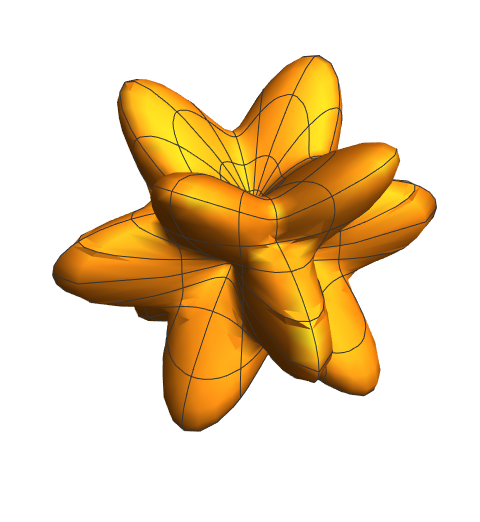

In [10]:
g2 = ParametricPlot3D[
  Evaluate[Through[{xx2, yy2, zz2}[u, v]]], {u, 0, 2 Pi}, {v, -Pi/2, 
   Pi/2}, Boxed -> False, Axes -> False]

In [11]:
Export["Fresnel_Elasticity_Surface.stl", g2]

Fresnel_Elasticity_Surface.stl

In [13]:
reg = ImplicitRegion[z^2 + y^2 == Sqrt[4 - x^2]^2 && -1 <= x <= 1, {x, y, z}]

2    2         2
ImplicitRegion[y  + z  == 4 - x  && -1 <= x <= 1, {x, y, z}]

MeshRegion[<3>, <2>]
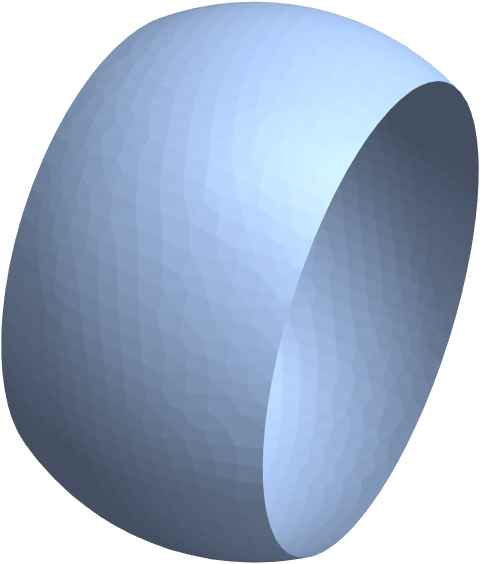

In [14]:
DiscretizeRegion[reg]

# Convergence Technique
Gerhard Dziuk; John E. Hutchinson
A finite element method for the computation of parametric minimal surfaces
https://dml.cz/bitstream/handle/10338.dmlcz/700094/Equadiff_08-1993-1_6.pdf

-Graphics3D-
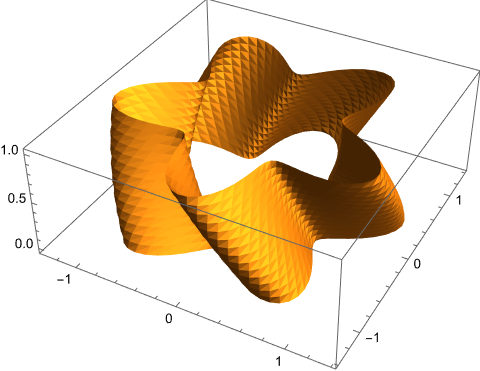

In [48]:
boundary = HoldPattern[{_, _, z_} /; Abs[z] > 0.0001 && Abs[z - 1] > 0.0001];
g = ParametricPlot3D[{Cos[u] (1 + 0.3 Sin[5 u + π v]), 
   Sin[u] (1 + 0.3 Sin[5 u + π v]), v}, {u, 0, 2 π}, {v, 0, 
   1}, PlotPoints -> {100, 15}, MaxRecursion -> 0, Mesh -> None, 
  NormalsFunction -> None]

# Costa Minimal Surface
The Costa surface is a complete minimal embedded surface of finite topology (i.e., it has no boundary and does not intersect itself). It has genus 1 with three punctures (Schwalbe and Wagon 1999). Until this surface was discovered by Costa (1984), the only other known complete minimal embeddable surfaces in R^3 with no self-intersections were the plane (genus 0), catenoid (genus 0 with two punctures), and helicoid (genus 0 with two punctures), and it was conjectured that these were the only such surfaces.

Rather amazingly, the Costa surface belongs to the D_4 dihedral group of symmetries.

{MeshRegion[<2>, <2>], MeshRegion[<2>, <2>], MeshRegion[<2>, <2>]}
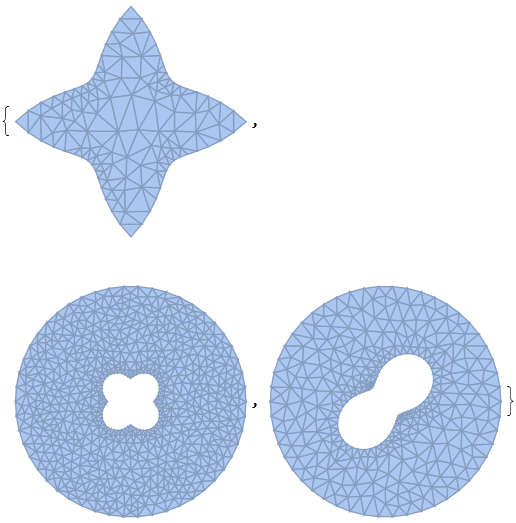

In [28]:
Needs["NDSolve`FEM`"];
r1 = 10.;
r2 = 6.;
h = 5.0;
n = 60;
m = 50;
hole0 = Table[{Cos@φ, Sin@φ} (2 - Abs@Sin[2 φ]), {φ, 2 π/n, 2 π, 2 π/n}];
hole1 = Table[{Cos@φ, Sin@φ} (2 + Abs@Sin[2 φ]), {φ, 2 π/n, 2 π, 2 π/n}];
hole2 = Table[{Cos@φ, Sin@φ} (2 + Sin[2 φ]), {φ, 2 π/n, 2 π, 2 π/n}];
circle = Table[{Cos@φ, Sin@φ}, {φ, 2 π/m, 2 π, 2 π/m}];
bm0 = ToBoundaryMesh["Coordinates" -> hole0, 
   "BoundaryElements" -> {LineElement@Partition[Range@n, 2, 1, 1]}];
{bm1, bm2} = ToBoundaryMesh["Coordinates" -> Join[#, #2 circle], 
     "BoundaryElements" -> {LineElement@
        Join[Partition[Range@n, 2, 1, 1], 
         n + Partition[Range@m, 2, 1, 1]]}] & @@@ {{hole1, 
     r1}, {hole2, r2}};
{em0, em1, em2} = ToElementMesh[#, "SteinerPoints" -> False, "MeshOrder" -> 1, 
     "RegionHoles" -> #2, MaxCellMeasure -> 0.4] & @@@ {{bm0, 
     None}, {bm1, {{0, 0}}}, {bm2, {0, 0}}};
MeshRegion /@ {em0, em1, em2}

-Graphics3D-
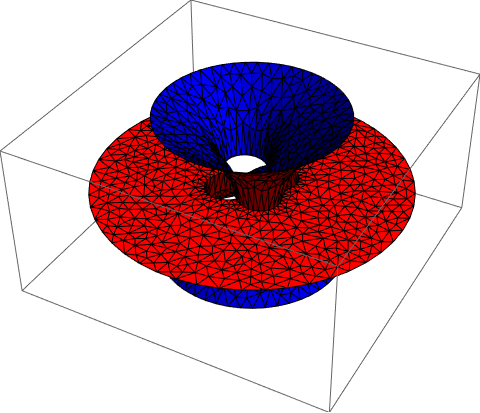

In [42]:
boundary = HoldPattern[{x_, y_, z_} /; 
    Not[x^2 + y^2 == r1^2 && z == 0 || x^2 + y^2 == r2^2 && Abs@z == h]];
g = Graphics3D[{FaceForm[Red, Blue], 
   GraphicsComplex[em0["Coordinates"] /. {x_, y_} :> {-x, y, 0.}, 
    Polygon@em0["MeshElements"][[1, 1]]], 
   GraphicsComplex[em1["Coordinates"] /. {x_, y_} :> {x, y, 0}, 
    Polygon@em1["MeshElements"][[1, 1]]], 
   GraphicsComplex[em2["Coordinates"] /. {x_, y_} :> {-x, y, 
       h Sqrt@Rescale[Sqrt[
          x^2 + y^2], {2 + (2 x y)/(x^2 + y^2), r2}]}, 
    Polygon@em2["MeshElements"][[1, 1]]], 
   GraphicsComplex[em2["Coordinates"] /. {x_, y_} :> {y, 
       x, -h Sqrt@Rescale[Sqrt[x^2 + y^2], {2 + (2 x y)/(x^2 + y^2), r2}]}, 
    Polygon@em2["MeshElements"][[1, 1]]]}]

# Hilbert Curve
The Hilbert curve (also known as the Hilbert space-filling curve) is a continuous fractal space-filling curve first described by the German mathematician David Hilbert in 1891, as a variant of the space-filling Peano curves discovered by Giuseppe Peano in 1890.

Because it is space-filling, its Hausdorff dimension is 2 (precisely, its image is the unit square, whose dimension is 2 in any definition of dimension; its graph is a compact set homeomorphic to the closed unit interval, with Hausdorff dimension 2).

The Hilbert curve is constructed as a limit of piecewise linear curves.The Hilbert curve is constructed as a limit of piecewise linear curves. The length of the $${\displaystyle nth}$$ curve  is $${\displaystyle \textstyle 2^{n}-{1 \over 2^{n}}}$$, i.e., the length grows exponentially with {\displaystyle n}n, even though each curve is contained in a square with area 1

-Graphics3D-
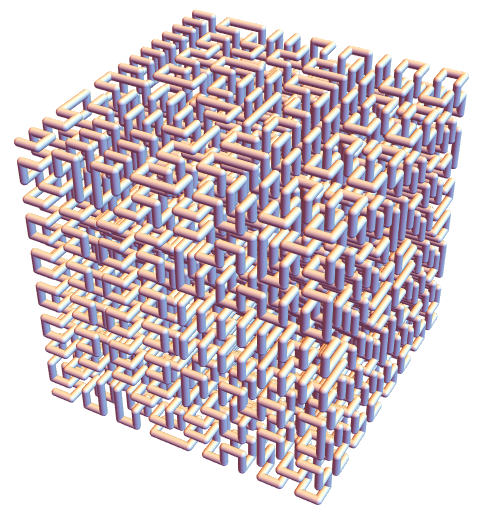

In [1]:
plot = Graphics3D[HilbertCurve[4, 3] /. Line[x_] :> Tube[x, .2], 
 Boxed -> False]

In [2]:
volume = Export["hilbert.stl", plot]

hilbert.stl

# Dodeca-Spidroball
A spidroball can be formed by applying folded spidrons to the surface of a polyhedron. The concept was originally developed by Daniel Erdely, Amina Buhler, and Marc Pelletier. This example shows a dodeca-spidroball formed by applying spidron tilings with 5 spiral arms to the surface of a dodecahedron.

-Graphics3D-
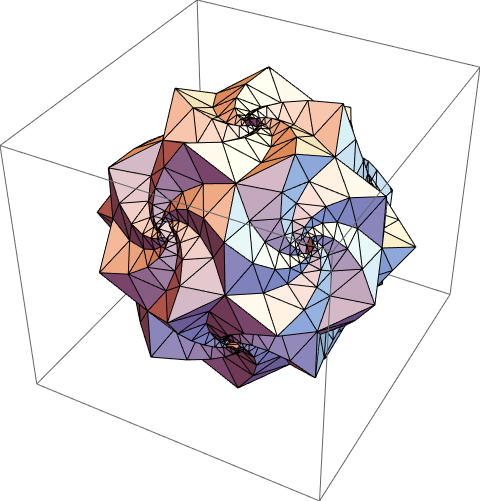

In [52]:
Ry[t_] := {{Cos[t], 0, Sin[t]}, {0, 1, 0}, {-Sin[t], 0, Cos[t]}}; Rz[t_] := {{Cos[t], -Sin[t], 0}, {Sin[t], Cos[t], 0}, {0, 0, 1}};
n = 6; t2 = Pi/5; t1 = t2/2; alpha = ArcCos[-Sqrt[5.0]/5]; dz = Sin[t1]^2 Tan[alpha/2]; z = GoldenRatio Tan[alpha/2]/2 + dz; scale = (Cos[t1] - Sqrt[3.0 (1 - Cos[t2])/2])/(2 Cos[t2] - 1); R = scale Rz[ArcCos[Cos[t1] + dz^2 (scale - 1)^2/(2 scale)]];
verts = {}; verts0 = Table[{Cos[i t2], Sin[i t2], (2 Mod[i, 2] - 1) dz}, {i, 0, 9}]; Do[verts = Join[verts, Map[{0, 0, z} + # &, verts0]]; verts0 = Map[R.# &, verts0], {n + 1}];
faces = Flatten[Table[10 i + {{j, Mod[j, 10] + 1, j + 10}, {j + 1, j + 10, Mod[j + 10, 20] + 1}}, {i, 0, n - 1}, {j, 1, 10}], 2];
ToPolys[verts_, faces_] := Map[Polygon[verts[[#]]] &, faces];
plot = Graphics3D[{ToPolys[verts, faces], Table[{ToPolys[Map[Rz[t + t2].Ry[Pi - alpha].# &, verts], faces], ToPolys[Map[Rz[t].Ry[alpha].Rz[t2].# &, verts], faces]}, {t, 2 t2, 2 Pi, 2 t2}], ToPolys[Map[Ry[Pi].# &, verts], faces]}]

In [58]:
Export["Dodeca_Spidroball.stl", plot]

Dodeca_Spidroball.stl